<a href="https://colab.research.google.com/github/ValentinoTriadi/K3-IF2220-13522139-13522164/blob/master/FINAL%20NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍭 <b>CANDY DATASET</b>
Attara Majesta Ayub (13522139)  
Valentino Chryslie Triadi (13522164)

<hr>

In [ ]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [ ]:
# Read Data
data = pd.read_csv("candy.csv")

<hr>

<b>1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. </b>

In [ ]:
from IPython.display import display

# Mengambil numeric values dari data
numeric_data = data.select_dtypes(include=[np.number]).iloc[:, 1:]
# Mengambil string values dari data
string_data = data.select_dtypes(include='object')

# Statistik untuk numeric values
numeric_stats = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Mode': numeric_data.mode().iloc[0],
    'Std': numeric_data.std(),
    'Variance': numeric_data.var(),
    'Range': numeric_data.max() - numeric_data.min(),
    'Minimum': numeric_data.min(),
    'Maximum': numeric_data.max(),
    'Q1': numeric_data.quantile(0.25),
    'Q2': numeric_data.quantile(0.50),
    'Q3': numeric_data.quantile(0.75),
    'IQR': numeric_data.quantile(0.75) - numeric_data.quantile(0.25),
    'Skewness': numeric_data.skew(),
    'Kurtosis': numeric_data.kurtosis()
})

border_style = {
    'selector': 'th',
    'props': [('border', '1px solid black')]
}

print("Statistika Numerik:")
numeric_stats = numeric_stats.round(3)
display(numeric_stats)

# Statistik untuk string values
string_stats = {}
for column in string_data.columns:
    unique_values = string_data[column].unique()
    proportion = len(unique_values) / len(string_data[column])
    string_stats[column] = {"unique_values": unique_values, "proportion": proportion}

print("\nStatistika String:\n")
for column, stats in string_stats.items():
    print(f"Kolom: {column}")
    print(f"Jumlah Nilai Unik: {len(stats['unique_values'])}")
    print(f"Proporsi Nilai Unik: {stats['proportion']:.3f}")
    print(f"Nilai Unik: {stats['unique_values']}")


Statistika Numerik:


,Mean,Median,Mode,Std,Variance,Range,Minimum,Maximum,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Calories,199.996,200.001,195.898,1.127,1.270,8.816,195.898,204.713,199.213,200.001,200.777,1.565,0.042,0.199
Serving,39.989,39.978,36.425,1.073,1.152,7.137,36.425,43.562,39.273,39.978,40.735,1.462,0.031,-0.119
Protein,2.974,2.979,-0.571,1.013,1.026,6.963,-0.571,6.392,2.246,2.979,3.655,1.409,0.090,-0.099
Sugar,20.004,20.005,16.925,0.889,0.790,5.997,16.925,22.922,19.410,20.005,20.589,1.179,0.006,-0.048
Sodium,74.983,75.000,71.406,1.007,1.015,6.826,71.406,78.232,74.277,75.000,75.678,1.401,-0.031,-0.025
Fat,6.748,6.668,5.162,0.658,0.433,4.336,5.162,9.499,6.279,6.668,7.170,0.891,0.537,0.235
Fiber,0.491,0.490,0.000,0.292,0.085,3.000,0.000,3.000,0.239,0.490,0.736,0.498,0.324,1.396
Popularity,49.967,49.955,-3.000,10.146,102.937,89.470,-3.000,86.470,42.948,49.955,57.153,14.205,-0.149,0.808



Statistika String:

Kolom: Flavour
Jumlah Nilai Unik: 4
Proporsi Nilai Unik: 0.002
Nilai Unik: ['Vanilla' 'Strawberry' 'Chocolate' 'undefined']


<hr>

<b>2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.</b>

Kita dapat mengidentifikasi outlier berdasarkan Interquartile Range (IQR). DIlakukan dengan menghitung perbedaan antara kuartil ketiga (Q3) dan kuartil pertama (Q1), yang merupakan ukuran penyebaran data di antara seperempat bagian teratas dan terbawah dari dataset. Titik data di luar rentang yang dibentuk oleh batas bawah dan batas atas dianggap sebagai outlier.

In [ ]:
# Cari kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Hitung interquartile range (IQR)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Hitung jumlah outlier
outliers_count = ((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).sum()
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Calories      15
Serving       11
Protein       12
Sugar         13
Sodium        13
Fat           20
Fiber          1
Popularity    12
dtype: int64


⭐ <b>Cara menangani data outlier</b>

* <b>Penghapusan Outlier </b>: Outlier dihapus dari dataset. Namun, outlier seharusnya tidak boleh dibuang begitu saja karena akan mempengaruhi model prediksi serta menghasilkan estimasi parameter yang kurang tepat. Penghapusan outlier biasanya digunakan jika outlier disebabkan oleh kesalahan dalam pengukuran atau entri data.
* <b>Transformasi Data</b>: Data dapat ditransformasikan menggunakan teknik seperti mean, logaritma, atau square root untuk menyeimbangkan distribusi data dan mengurangi dampak outlier.
* <b>Winsorization 5%</b>: Winsorizing data adalah transformasi statistik dengan membatasi nilai ekstrim dalam data statistik untuk mengurangi efek kemungkinan data outlier.Metode winzorize digunakan dengan cara mengganti data atas dan data bawah sebanyak 5% dari total seluruh sampel.
* <b>Clustering</b>: Clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum.
* <b>Regresi Robust</b>: Regresi robust merupakan metode regresi yang digunakan ketika distribusi dari residual tidak normal atau adanya beberapa outliers yang berpengaruh pada model. Dalam regresi robust terdapat beberapa metode estimasi seperti estimasi-M (*M-estimation*), estimasi *Least Median Square* (LMS), estimasi *Least Trimmed Square* (LTS), estimasi-S (S-estimation), estimasi *Method of Moment* (MM) (Chen, 2002).


⭐ <b>Metode yang dipilih</b>

  Dalam soal ini, dilakukan transformasi pada data dengan menggunakan nilai rata-rata (mean) dari atribut yang bersangkutan. Proses transformasi ini dilakukan agar tidak ada informasi yang hilang.

  Sebagai contoh, menghapus sebuah data outlier di kolom Calories akan menghapus data atribut lain yang bukan merupakan outlier. Hal ini akan mengurangi akurasi estimasi parameter.

  Selain itu, mengganti data outlier dengan mean akan menjamin bahwa rata-rata keseluruhan attribute tidak berubah dari data asli setelah dilakukan handling outliers. Metode ini menyeimbangkan distribusi data dan mengurangi dampak outlier terhadap analisis statistik.

In [ ]:
# Handle Outliers

# Mengubah data outlier menjadi mean atributnya
for column in numeric_data.columns:
    numeric_data[column] = np.where(numeric_data[column] > upper_threshold[column], numeric_data[column].mean(), numeric_data[column])
    numeric_data[column] = np.where(numeric_data[column] < lower_threshold[column], numeric_data[column].mean(), numeric_data[column])

print("\nNumber of outliers in each column after handling:")
print(((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).sum())


Number of outliers in each column after handling:
Calories      0
Serving       0
Protein       0
Sugar         0
Sodium        0
Fat           0
Fiber         0
Popularity    0
dtype: int64


<hr>

<b>3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. </b>

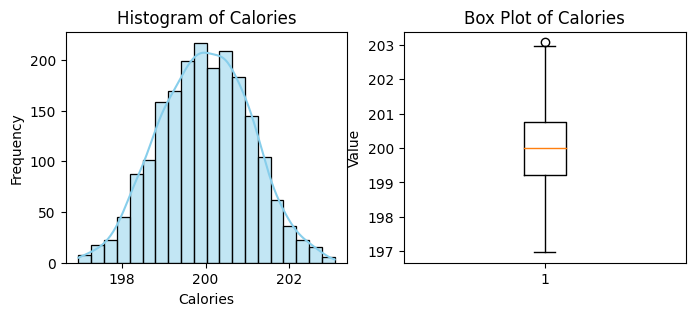

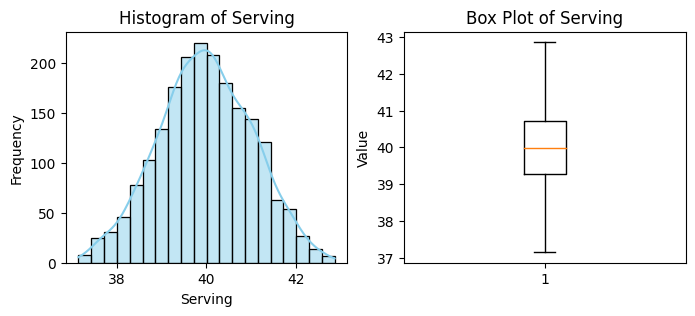

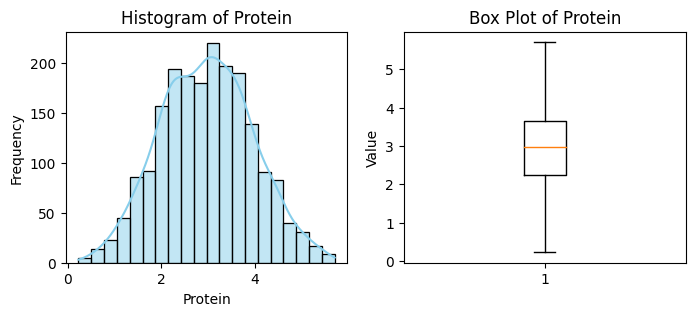

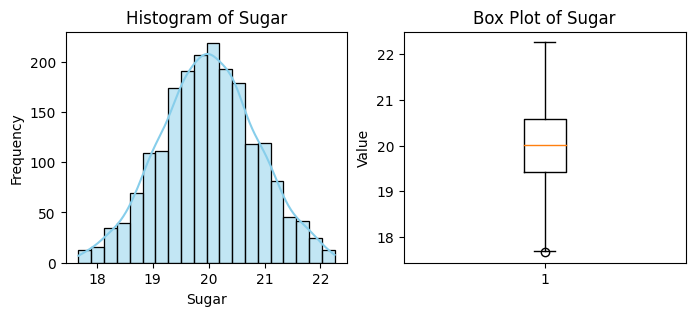

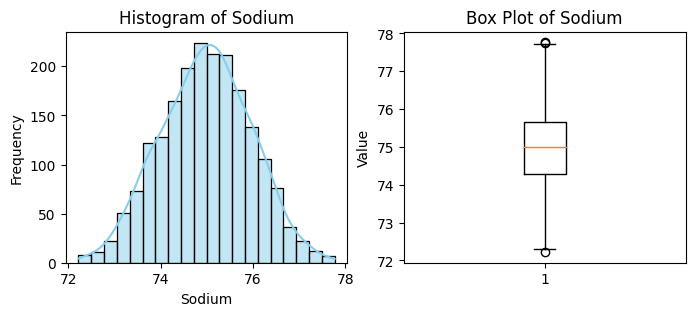

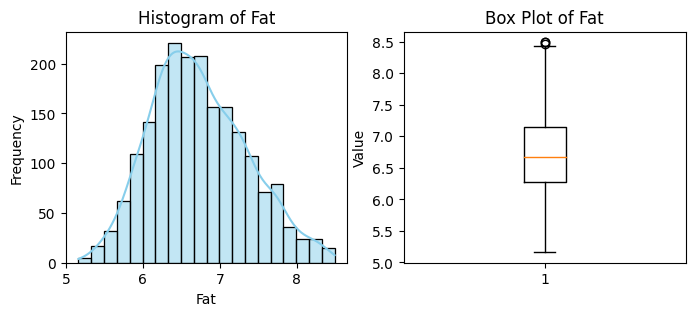

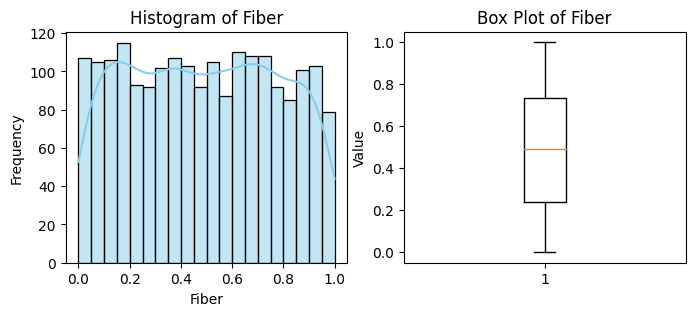

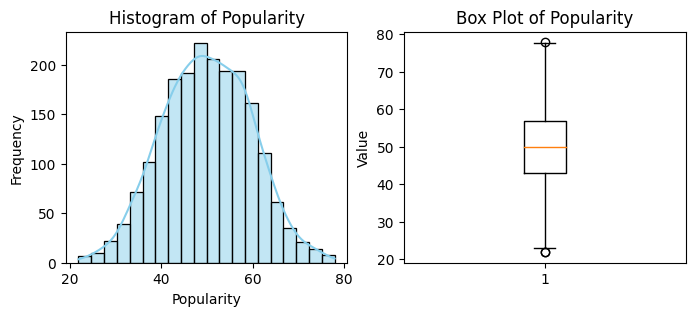

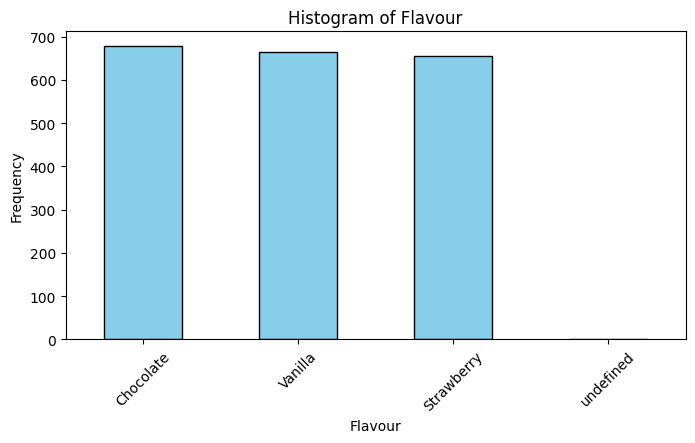

In [ ]:
# Numeric data plot
for column in numeric_data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    sns.histplot(numeric_data[column], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    axes[1].boxplot(numeric_data[column])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_ylabel('Value')

    plt.show()

# String data plot
for column in string_data.columns:
    plt.figure(figsize=(8, 4))
    string_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


<hr>

<b>4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?</b>

⭐ <b>Identifikasi berdasarkan hasil visualisasi histogram</b>

 * <b>Distribusi Normal (Gaussian)</b>: Histogram memiliki bentuk lonceng (bell-shaped) dengan puncaknya di tengah dan simetris di sekitarnya. Distribusi normal memiliki nilai rata-rata (mean) dan standar deviasi yang dapat digunakan untuk mendeskripsikan penyebaran data.

 * <b>Distribusi Skewed (Condong)</b>: Histogram memiliki *tail* yang lebih panjang ke satu sisi daripada yang lain, sehingga tidak simetris. Distribusi skewness dapat berupa positive skew (ekor ke kanan) atau negative skew (ekor ke kiri).

 * <b>Distribusi Bimodal (Dua Puncak)</b>: Histogram memiliki dua puncak yang jelas, menunjukkan bahwa data memiliki dua kelompok utama.

 * <b>Distribusi Uniform (Seragam)</b>: Histogram memiliki distribusi yang merata, tanpa ada kelompok atau puncak yang jelas.

⭐ <b>Metode yang lebih akurat</b>

Fungsi <b>skew</b> dari <b>library scipy.stats</b> dapat digunakan untuk mengambil nilai skewness data yang eksak. Nilai tersebut kemudian digunakan untuk menentukan jenis distribusi dengan ketentuan berikut:

* Nilai skewness == 0 berarti distribusi normal atau Gaussian
* Nilai skewness < 0 berarti distribusi Negative Skewed
* Nilai skewness > 0 berarti distribusi Positive Skewed

In [ ]:
from scipy.stats import skew

table_data = []

for column in numeric_data.columns:
    data_temp = numeric_data[column]
    data_skew = skew(data_temp)

    if data_skew > 0:
        table_data.append(['Positive Skew', column, data_skew])
    elif data_skew < 0:
        table_data.append(['Negative Skew', column, data_skew])
    else:
        table_data.append(['Gaussian', column, data_skew])

df = pd.DataFrame(table_data, columns=['Distribution', 'Attribute', 'Skewness'])
df['Skewness'] = df['Skewness'].map('{:.3f}'.format)
df_grouped = df.groupby(['Distribution', 'Skewness']).agg({'Attribute': ', '.join}).reset_index()
print(df_grouped.to_string(index=False))


 Distribution Skewness  Attribute
Negative Skew   -0.001 Popularity
Negative Skew   -0.002      Sugar
Negative Skew   -0.012    Serving
Negative Skew   -0.016   Calories
Negative Skew   -0.034     Sodium
Positive Skew    0.021      Fiber
Positive Skew    0.065    Protein
Positive Skew    0.350        Fat


Analisis:
<ol>
<li>Visualisasi kolom <b>Sodium, Calories, Serving, Sugar,</b> dan <b>Popularity</b> memenuhi <b>Negative Skewed</b></li>
<li>Visualisasi kolom <b>Fiber, Protein, dan Fat</b> adalah <b>Positive Skewed</b></li>
<li>Tidak ada kolom yang <b>terdistribusi normal</b>.
</ol>

<hr>

In [ ]:
# Utils With Built-in func

from typing import Tuple

# distribusi binomial dari 0 sampai x dengan n = jumlah percobaan dan p = probabilitas sukses
def binomial_distribution_less_than_range(x, n, p):
    return st.binom.cdf(x, n, p)

# distribusi binomial dari x sampai n dengan n = jumlah percobaan dan p = probabilitas sukses
def binomial_distribution_greater_than_range(x, n, p):
    return 1 - st.binom.cdf(x, n, p)

# distribusi binomial dari x1 sampai x2 dengan n = jumlah percobaan dan p = probabilitas sukses
def binomial_distribution_between_range(x1, x2, n, p):
    return st.binom.cdf(x2, n, p) - st.binom.cdf(x1-1, n, p)

# distribusi normal untuk mencari nilai z dari alpha
def normal_distribution(alpha):
    return st.norm.ppf(1-alpha)

# distribusi binomial untuk x dengan n = jumlah percobaan dan p = probabilitas sukses
def binomial_distribution(x, n, p):
    return np.math.comb(n, x) * p**x * (1-p)**(n-x)

# t test untuk mencari nilai critical
def t_test_critical_value(df, alpha) -> float:
    return st.t.ppf(1-alpha, df)

# f test untuk mencari nilai critical
# n1 = jumlah sampel pada data pertama
# n2 = jumlah sampel pada data kedua
# alpha = level signifikansi
# returns f test critical value (lower, upper)
def f_test_critical_value(alpha, df1, df2) -> Tuple[float, float]:
    return st.f.ppf(alpha, df1, df2), st.f.ppf(1-alpha, df1, df2)

# Mencari P-Value dari t test
def t_test_p_value(t, df) -> float:
    return st.t.sf(t, df) * 2


# Mencari P-Value dari f test
def f_test_p_value(f, df1, df2) -> float:
    return st.f.sf(f, df1, df2)

# Mencari P-Value dari z test
def z_test_p_value(z) -> float:
    return st.norm.sf(z)

<hr>

Andi baru saja mendapatkan pekerjaan di sebuah perusahaan permen. Di hari pertama kerja, Ia diminta untuk mengamati permen-permen yang dihasilkan pada pabrik. Selain itu, ia juga diberikan dataset yang berisi informasi mengenai permen-permen yang baru diproduksi. Lalu, ia diminta untuk melakukan analisis statistika terhadap permen-permen tersebut serta melakukan berbagai pengujian terhadap berbagai hipotesis. Bantulah Andi dalam melakukan hal-hal tersebut!

Atribut: Calories, Serving, Protein, Sugar, Sodium, Fat, Fiber, Flavour, Popularity

Gunakan alpha = 0.05

<b>5. Hipotesis 1 sampel</b>

* Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
* Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
* Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
* Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!


In [ ]:
# 5 Tanpa Hipotesis
alpha = 0.05

# Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
avg_sugar = data['Sugar'].mean()
assert avg_sugar < 25, "Rata-rata Sugar tidak kurang dari 25"
print("Rata-rata Sugar kurang dari 25, yaitu {:.3f}".format(avg_sugar))

# Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
avg_serving = data['Serving'].mean()
assert avg_serving != 40, "Rata-rata Serving tidak sama dengan 40"
print("Rata-rata Serving tidak sama dengan 40, yaitu {:.3f}".format(avg_serving))

# Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
avg_last_20_sodium = data['Sodium'].tail(20).mean()
assert avg_last_20_sodium != 74, "Rata-rata Sodium tidak sama dengan 74"
print("Rata-rata Sodium tidak sama dengan 74, yaitu {:.3f}".format(avg_last_20_sodium))

# Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!
proporsi_protein_lebih_besar_3 = data['Protein'][data['Protein'] > 3].count() / len(data)
assert proporsi_protein_lebih_besar_3 != 0.6, "Proporsi Protein tidak sama dengan 60%"
print("Proporsi Protein tidak sama dengan 60%, yaitu", proporsi_protein_lebih_besar_3*100, "%")


Rata-rata Sugar kurang dari 25, yaitu 20.004
Rata-rata Serving tidak sama dengan 40, yaitu 39.989
Rata-rata Sodium tidak sama dengan 74, yaitu 74.527
Proporsi Protein tidak sama dengan 60%, yaitu 49.25 %


In [ ]:
# 5 Dengan Hipotesis (Library)
# T-Test
# Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
t, p = st.ttest_1samp(data['Sugar'], 25, alternative='less')
print("Rata-rata Sugar kurang dari 25" if p < alpha else "Rata-rata Sugar tidak kurang dari 25")

# Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
t, p = st.ttest_1samp(data['Serving'], 40, alternative='two-sided')
print("Rata-rata Serving tidak sama dengan 40" if p < alpha else "Rata-rata Serving sama dengan 40")

# Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
t, p = st.ttest_1samp(data['Sodium'].tail(20), 74, alternative='two-sided')
print("Rata-rata 20 Sodium terakhir tidak sama dengan 74" if p < alpha else "Rata-rata 20 Sodium terakhir sama dengan 74")

# Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!
t, p = st.ttest_1samp(data['Protein'][data['Protein'] > 3], 0.6)
print("Proporsi Protein yang lebih dari 3 tidak sama dengan 60%" if p < alpha else "Proporsi Protein yang lebih dari 3 sama dengan 60%")


Rata-rata Sugar kurang dari 25
Rata-rata Serving sama dengan 40
Rata-rata 20 Sodium terakhir tidak sama dengan 74
Proporsi Protein yang lebih dari 3 tidak sama dengan 60%


In [ ]:
# 5 Dengan Hipotesis
alpha = 0.05
jumlahSample = len(data)
critical_value = normal_distribution(alpha) # Z value for alpha = 0.05
critical_value_2 = normal_distribution(alpha/2) # Z value for alpha/2 = 0.025


# 1. Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?
# Persoalan ini dapat diselesaikan dengan menggunakan z-test
# - H0: avg_sugar = 25
# - H1 = avg_sugar < 25
# - alpha = 0.05
# - Critical region dengan z-test: z < -z(0.05)
# - Komputasi
z = (data['Sugar'].mean() - 25) / (data['Sugar'].std() / np.sqrt(jumlahSample))
P_Value = z_test_p_value(abs(z))
# - Kesimpulan
print("1.")
# Jika z < -z(0.05), maka H0 ditolak dan berarti rata-rata Sugar kurang dari 25
print("Uji Statistik:", "Rata-rata Sugar kurang dari 25" if z < -critical_value else "Rata-rata Sugar tidak kurang dari 25")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Sugar kurang dari 25
print("Uji Signifikan:", "Rata-rata Sugar kurang dari 25" if P_Value < alpha else "Rata-rata Sugar tidak kurang dari 25")
print()


# 2. Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!
# Persoalan ini dapat diselesaikan dengan menggunakan z-test
# - H0: avg_serving = 40
# - H1 = avg_serving != 40
# - alpha = 0.05
# - Critical region dengan z-test: z < -z(0.025) atau z > z(0.025)
# - Komputasi
z = (avg_serving - 40) / (data['Serving'].std() / np.sqrt(jumlahSample))
P_Value = 2 * z_test_p_value(abs(z))
# - Kesimpulan
print("2.")
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti rata-rata Serving tidak sama dengan 40
print("Uji Statistik:", "Rata-rata Serving tidak sama dengan 40" if z < -critical_value_2 or z > critical_value_2 else "Rata-rata Serving sama dengan 40")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Serving tidak sama dengan 40
print("Uji Signifikan:", "Rata-rata Serving tidak sama dengan 40" if P_Value < alpha else "Rata-rata Serving sama dengan 40")
print()


# 3. Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!
# Persoalan ini dapat diselesaikan dengan menggunakan t-test karena jumlah sampel < 30 (relatif sedikit)
# - H0: avg_sodium = 74
# - H1 = avg_sodium != 74
# - alpha = 0.05
# - Critical region dengan z-test: z < -z(0.025) atau z > z(0.025)
# - Komputasi
last_20_sodium = data['Sodium'].tail(20)
t = (last_20_sodium.mean() - 74) / (last_20_sodium.std() / np.sqrt(20))
t_critical = t_test_critical_value(20 - 1, alpha)
df = 20 - 1
P_Value = t_test_p_value(t, df)
# - Kesimpulan
print("3.")
# Jika t < -t(0.025, 19) atau t > t(0.025, 19), maka H0 ditolak dan berarti rata-rata Sodium tidak sama dengan 74
print("Uji Statistik:", "Rata-rata 20 Sodium terakhir tidak sama dengan 74" if t < -t_critical or t > t_critical else "Rata-rata 20 Sodium terakhir sama dengan 74")
# Jika P-Value < alpha, maka H0 ditolak dan berarti rata-rata Sodium tidak sama dengan 74
print("Uji Signifikan:", "Rata-rata 20 Sodium terakhir tidak sama dengan 74" if P_Value < alpha else "Rata-rata 20 Sodium terakhir sama dengan 74")
print()


# 4. Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!
# Persoalan ini dapat diselesaikan dengan menggunakan z-test
# - H0: proporsi_protein = 0.6
# - H1 = proporsi_protein != 0.6
# - alpha = 0.05
# - Critical region: z < -z(0.025) atau z > z(0.025)
# - Komputasi
protein_lebih_besar_3 = data['Protein'][data['Protein'] > 3]
x = protein_lebih_besar_3.count()
p0 = 0.6
p = x / jumlahSample
z = (p - p0) / np.sqrt(p0 * (1 - p0) / jumlahSample)
P_Value = 2 * z_test_p_value(abs(z))
# - Kesimpulan
print("4.")
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti proporsi Protein tidak sama dengan 60%
print("Uji Statistik:", "Proporsi Protein yang lebih dari 3 tidak sama dengan 60%" if z < -critical_value_2 or z > critical_value_2 else "Proporsi Protein yang lebih dari 3 sama dengan 60%")
# Jika P-Value < alpha, maka H0 ditolak dan berarti proporsi Protein tidak sama dengan 60%
print("Uji Signifikan:", "Proporsi Protein yang lebih dari 3 tidak sama dengan 60%" if P_Value < alpha else "Proporsi Protein yang lebih dari 3 sama dengan 60%")
print()

1.
Uji Statistik: Rata-rata Sugar kurang dari 25
Uji Signifikan: Rata-rata Sugar kurang dari 25

2.
Uji Statistik: Rata-rata Serving sama dengan 40
Uji Signifikan: Rata-rata Serving sama dengan 40

3.
Uji Statistik: Rata-rata 20 Sodium terakhir tidak sama dengan 74
Uji Signifikan: Rata-rata 20 Sodium terakhir tidak sama dengan 74

4.
Uji Statistik: Proporsi Protein yang lebih dari 3 tidak sama dengan 60%
Uji Signifikan: Proporsi Protein yang lebih dari 3 tidak sama dengan 60%



<hr>

6. Hipotesis 2 sampel
Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang.

* Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
* Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
* Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
* Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!


In [ ]:
# 6 Tanpa Hipotesis

# Bagi dataset menjadi dua bagian yang sama besar, yaitu awal produksi dan akhir produksi!
dataset1 = data.iloc[:len(data)//2] # 0 sampai setengah
dataset2 = data.iloc[len(data)//2:] # setengah sampai akhir

# Periksalah apakah jumlah data pada awal produksi dan akhir produksi sama!
assert len(dataset1) == len(dataset2), "Jumlah data tidak sama"

# 1. Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
print("Rata-rata Sugar pada awal produksi: {:.3f}".format(dataset1['Sugar'].mean()))
print("Rata-rata Sugar pada akhir produksi: {:.3f}".format(dataset2['Sugar'].mean()))
print("Rata-rata Sugar pada awal produksi sama dengan akhir produksi" if dataset1['Sugar'].mean() == dataset2['Sugar'].mean() else "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi")
print()

# 2. Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
print("Rata-rata Protein pada awal produksi: {:.3f}".format(dataset1['Protein'].mean()))
print("Rata-rata Protein pada akhir produksi: {:.3f}".format(dataset2['Protein'].mean()))
print("Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if dataset1['Protein'].mean() > dataset2['Protein'].mean() + 0.3 else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
print()

# 3. Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
print("Variansi Sodium pada awal produksi: {:.3f}".format(dataset1['Sodium'].var()))
print("Variansi Sodium pada akhir produksi: {:.3f}".format(dataset2['Sodium'].var()))
print("Variansi Sodium pada awal produksi sama dengan akhir produksi" if dataset1['Sodium'].var() == dataset2['Sodium'].var() else "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi")
print()

# 4. Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
print("Proporsi Calories > 200 pada awal produksi: {:.3f}".format(dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1)))
print("Proporsi Calories > 200 pada akhir produksi: {:.3f}".format(dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2)))
print("Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1) > dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2) else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")



Rata-rata Sugar pada awal produksi: 19.978
Rata-rata Sugar pada akhir produksi: 20.030
Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi

Rata-rata Protein pada awal produksi: 2.986
Rata-rata Protein pada akhir produksi: 2.963
Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit

Variansi Sodium pada awal produksi: 1.043
Variansi Sodium pada akhir produksi: 0.988
Variansi Sodium pada awal produksi tidak sama dengan akhir produksi

Proporsi Calories > 200 pada awal produksi: 0.521
Proporsi Calories > 200 pada akhir produksi: 0.480
Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi


In [ ]:
# 6 Dengan Hipotesis (Library)

from statsmodels.stats.proportion import proportions_ztest

# 1. Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu
t_stat_sugar, p_value_sugar = st.ttest_ind(dataset1['Sugar'], dataset2['Sugar'])
print("1. Uji Statistik:", "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi" if p_value_sugar < alpha else "Rata-rata Sugar pada awal produksi sama dengan akhir produksi")
print()

# 2. Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit
t_stat_protein, p_value_protein = st.ttest_ind(dataset1['Protein'], dataset2['Protein'], equal_var = False)
print("2. Uji Statistik:", "Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if t_stat_protein > 0 and p_value_protein < alpha else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
print()

# 3. Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir
f_stat_sodium, p_value_sodium = st.levene(dataset1['Sodium'], dataset2['Sodium'])
print("3. Uji Statistik:", "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi" if p_value_sodium < alpha else "Variansi Sodium pada awal produksi sama dengan akhir produksi")
print()

# 4. Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
first_half_count = len(dataset1['Calories'][dataset1['Calories'] > 200])
second_half_count = len(dataset2['Calories'][dataset2['Calories'] > 200])

# Total permen pada masing-masing paruh
first_half_total = len(dataset1['Calories'])
second_half_total = len(dataset2['Calories'])

# Data untuk uji proporsi
count = np.array([first_half_count, second_half_count])
nobs = np.array([first_half_total, second_half_total])

# Uji proporsi
stat, pval = proportions_ztest(count, nobs, alternative='larger')

alpha = 0.05

# Hasil uji statistik
print("4. Uji Statistik:", "Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if pval < alpha else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")

1. Uji Statistik: Rata-rata Sugar pada awal produksi sama dengan akhir produksi

2. Uji Statistik: Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit

3. Uji Statistik: Variansi Sodium pada awal produksi sama dengan akhir produksi

4. Uji Statistik: Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi


In [ ]:
# 6 Dengan Hipotesis

# Keterangan Variabel:
# x0 = rata-rata dataset1
# x1 = rata-rata dataset2
# p0 = proporsi dataset1
# p1 = proporsi dataset2
# s0 = variansi dataset1
# s1 = variansi dataset2
# p = proporsi gabungan
# d0 = nilai yang diinginkan / selisih
# d = selisih rata-rata
# sp = standar deviasi sampel
# t = nilai statistik uji
# t_critical = nilai kritis uji
# f = nilai statistik uji
# f_critical = nilai kritis uji


# Bagi dataset menjadi dua bagian yang sama besar, yaitu dataset1 dan dataset2!
dataset1 = data.iloc[:len(data)//2] # 0 sampai setengah
dataset2 = data.iloc[len(data)//2:] # setengah sampai akhir

# Periksalah apakah jumlah data pada dataset1 dan dataset2 sama!
assert len(dataset1) == len(dataset2), "Jumlah data tidak sama"

alpha = 0.05
z_critical = normal_distribution(alpha)
z_critical2 = normal_distribution(alpha/2)
jumlahSample1 = jumlahSample2 = len(data)//2


# 1. Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!
# Persoalan ini dapat diselesaikan dengan menggunakan z-test karena jumlah sampel > 30 (relatif banyak)
# - H0: avg_sugar1 = avg_sugar2 atau avg_sugar1 - avg_sugar2 = 0
# - H1 = avg_sugar1 != avg_sugar2 atau avg_sugar1 - avg_sugar2 != 0
# - alpha = 0.05
# - Uji statistik t test dengan critical range -z(0.025) < z < z(0.025)
# - Komputasi
x0 = dataset1['Sugar'].mean()
x1 = dataset2['Sugar'].mean()
s0 = dataset1['Sugar'].var()
s1 = dataset2['Sugar'].var()
d0 = 0
d = x0 - x1
z = (x0 - x1) / np.sqrt(s0/jumlahSample1 + s1/jumlahSample2)
P_Value = 2 * z_test_p_value(abs(z))
# - Kesimpulan
print("1.")
# Jika z < -z(0.025) atau z > z(0.025), maka H0 ditolak dan berarti rata-rata Sugar tidak sama
print("Uji Statistik:", "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi" if z < -z_critical2 or z > z_critical2 else "Rata-rata Sugar pada awal produksi sama dengan akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Rata-rata Sugar pada awal produksi tidak sama dengan akhir produksi" if P_Value < alpha else "Rata-rata Sugar pada awal produksi sama dengan akhir produksi")
print()

# 2. Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?
# Persoalan ini dapat diselesaikan dengan menggunakan z-test karena jumlah sampel > 30 (relatif banyak)
# - H0: avg_protein1 - avg_protein2 = 0.3
# - H1: avg_protein1 - avg_protein2 != 0.3
# - alpha = 0.05
# - Uji statistik z test dengan critical range -z(0.025) < z < z(0.025)
# - Komputasi
x0 = dataset1['Protein'].mean()
x1 = dataset2['Protein'].mean()
s0 = dataset1['Protein'].var()
s1 = dataset2['Protein'].var()
d0 = 0.3
d = x0 - x1
z = (d - d0) / data['Protein'].std() / np.sqrt(jumlahSample1)
P_Value = 2 * z_test_p_value(abs(z))
# - Kesimpulan
print("2.")
# Jika z < -z(0.025) atau z > z(0.025) , maka H0 ditolak dan berarti rata-rata Protein pada dataset1 lebih besar dari dataset2 sebesar 0.3 unit
print("Uji Statistik:", "Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if z < -z_critical2 or z > z_critical2 else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Rata-rata Protein pada awal produksi lebih besar dari akhir produksi sebesar 0.3 unit" if P_Value < alpha else "Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit")
print()


# 3. Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!
# Persoalan ini dapat diselesaikan dengan menggunakan f-test karena yang diuji adalah variansi
# - H0: var_sodium1 = var_sodium2 atau var_sodium1 - var_sodium2 = 0
# - H1 = var_sodium1 != var_sodium2 atau var_sodium1 - var_sodium2 != 0
# - alpha = 0.05
# - Uji statistik f test dengan critical range f < f(0.05, df1, df2) atau f > f(0.95, df1, df2)
# - Komputasi
df1 = jumlahSample1 - 1
df2 = jumlahSample2 - 1
var_sodium1 = dataset1['Sodium'].var()
var_sodium2 = dataset2['Sodium'].var()
f = var_sodium1 / var_sodium2
f_critical = f_test_critical_value(alpha/2, df1, df2) # [0] -> lower (alpha), [1] -> upper (1-alpha)
P_Value = f_test_p_value(f, df1, df2)
# - Kesimpulan
print("3.")
# Jika f < f(0.95, df1, df2) atau f > f(0.05, df1, df2), maka H0 ditolak dan berarti variansi Sodium tidak sama
print("Uji Statistik:", "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi" if f < f_critical[0] or f > f_critical[1] else "Variansi Sodium pada awal produksi sama dengan akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Variansi Sodium pada awal produksi tidak sama dengan akhir produksi" if P_Value < alpha else "Variansi Sodium pada awal produksi sama dengan akhir produksi")
print()


# 4. Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!
# Persoalan ini dapat diselesaikan dengan menggunakan z-test karena jumlah sampel > 30 (relatif banyak)
# - H0: proporsi_calories1 = proporsi_calories2 atau proporsi_calories1 - proporsi_calories2 = 0
# - H1 = proporsi_calories1 > proporsi_calories2 atau proporsi_calories1 - proporsi_calories2 > 0
# - alpha = 0.05
# - Uji statistik z test dengan critical range z > z(0.05)
# - Komputasi
df = jumlahSample1 + jumlahSample2 - 2
p0 = dataset1['Calories'][dataset1['Calories'] > 200].count() / len(dataset1) # Proporsi awal
p1 = dataset2['Calories'][dataset2['Calories'] > 200].count() / len(dataset2) # Proporsi akhir
p = (dataset1['Calories'][dataset1['Calories'] > 200].count() + dataset2['Calories'][dataset2['Calories'] > 200].count()) / (jumlahSample1 + jumlahSample2) # (n awal + n akhir) / (jumlahSample1 + jumlahSample2)
z = (p0 - p1) / np.sqrt(p * (1 - p) * (1/jumlahSample1 + 1/jumlahSample2))
z_critical = normal_distribution(alpha)
P_Value = z_test_p_value(abs(z))
# - Kesimpulan
print("4.")
# Jika z > z(0.05), maka H0 ditolak dan berarti proporsi Calories pada dataset1 lebih besar dari dataset2
print("Uji Statistik:", "Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if z > z_critical else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")
# Jika P-value < alpha, maka H0 ditolak
print("Uji Signifikan", "Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi" if P_Value < alpha else "Proporsi Calories > 200 pada awal produksi tidak lebih besar dari akhir produksi")

1.
Uji Statistik: Rata-rata Sugar pada awal produksi sama dengan akhir produksi
Uji Signifikan Rata-rata Sugar pada awal produksi sama dengan akhir produksi

2.
Uji Statistik: Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit
Uji Signifikan Rata-rata Protein pada awal produksi tidak lebih besar dari akhir produksi sebesar 0.3 unit

3.
Uji Statistik: Variansi Sodium pada awal produksi sama dengan akhir produksi
Uji Signifikan Variansi Sodium pada awal produksi sama dengan akhir produksi

4.
Uji Statistik: Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi
Uji Signifikan Proporsi Calories > 200 pada awal produksi lebih besar dari akhir produksi
